# Subscription Prediction
## Written by Leo Carrico

The basis is that there exists a mobile app with all sorts of free and premium features for the Users to use. The first day that the Users download the app, they are given a 24 hour free trial for the premium subscription. During the first 24 hours, we track which screens they visit, any pages they liked, and an activitiy that they do. <br>
Based on their interactions with the app within the first 24 hours, we would like to predict their likelihood of purchasing a subscription for the premium membership.

## Importing our data

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

In [217]:
data = pd.read_csv("data/appdata10.csv")
data.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [218]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning
In order to begin analysing and predicting, we need to clean our dataset.

In [219]:
data['hour'] = data.hour.str.slice(1, 3).astype(int)
data['hour'].describe()

count    50000.000000
mean        12.557220
std          7.438072
min          0.000000
25%          5.000000
50%         14.000000
75%         19.000000
max         23.000000
Name: hour, dtype: float64

In [220]:
base_features = data[['dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'used_premium_feature','liked']]
base_features.head(5)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## Numerical Visualizations

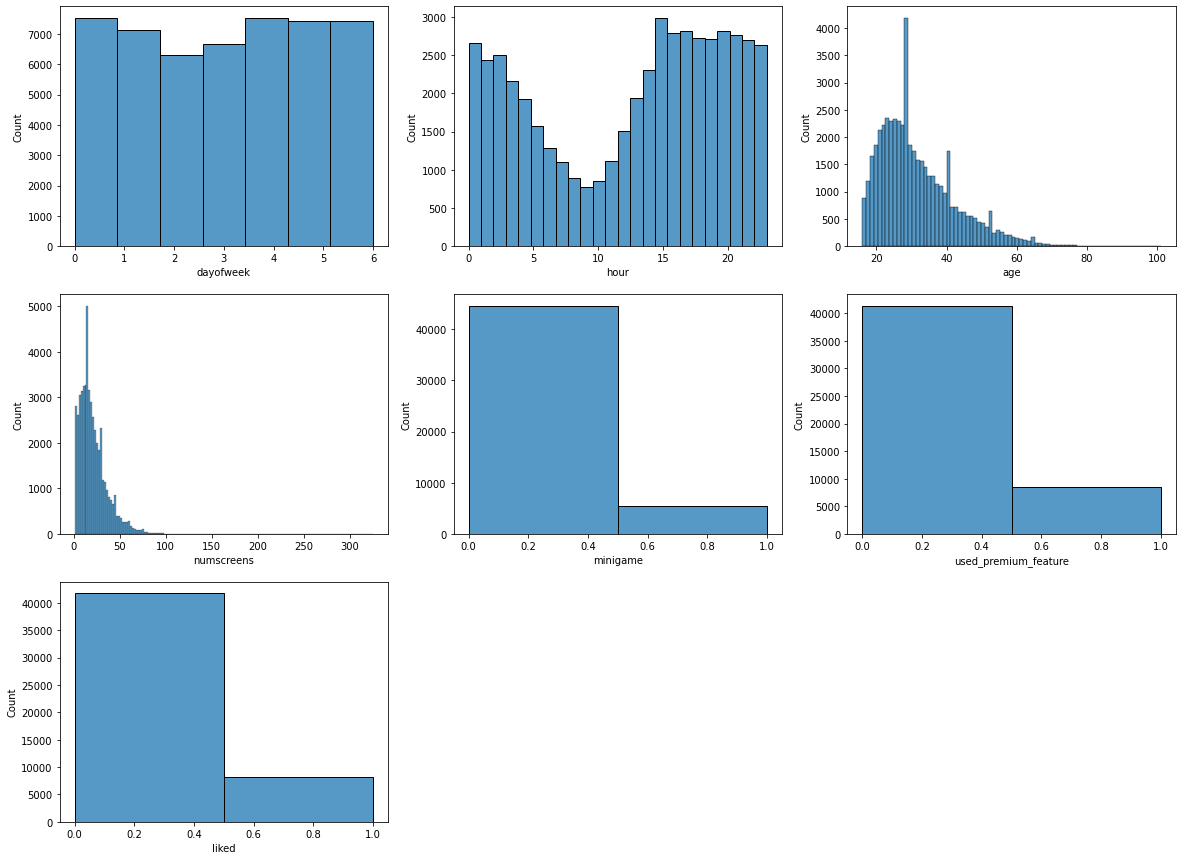

In [221]:
n = len(base_features.columns)
cols = 3
rows = round(n/cols + 0.5)

fig, ax = plt.subplots(rows, cols, figsize=(20,15))
for i in range(rows):
    for j in range(cols):
        curr = cols*i + j
        if curr >= n:
            ax[i, j].axis('off')
        else:
            bins = len(data[base_features.columns[curr]].unique())
            sns.histplot(data=data, x=base_features.columns[curr], ax=ax[i, j], bins=bins)


<AxesSubplot:>

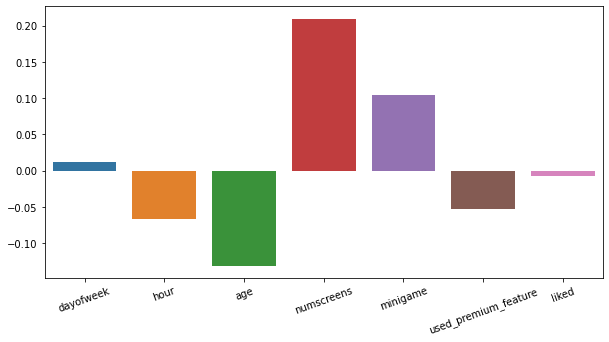

In [222]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=20)
sns.barplot(x=bflc.index, y=bflc.values)

In [223]:
# Base Features Correlations
bfc = base_features.corr()
bfc

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


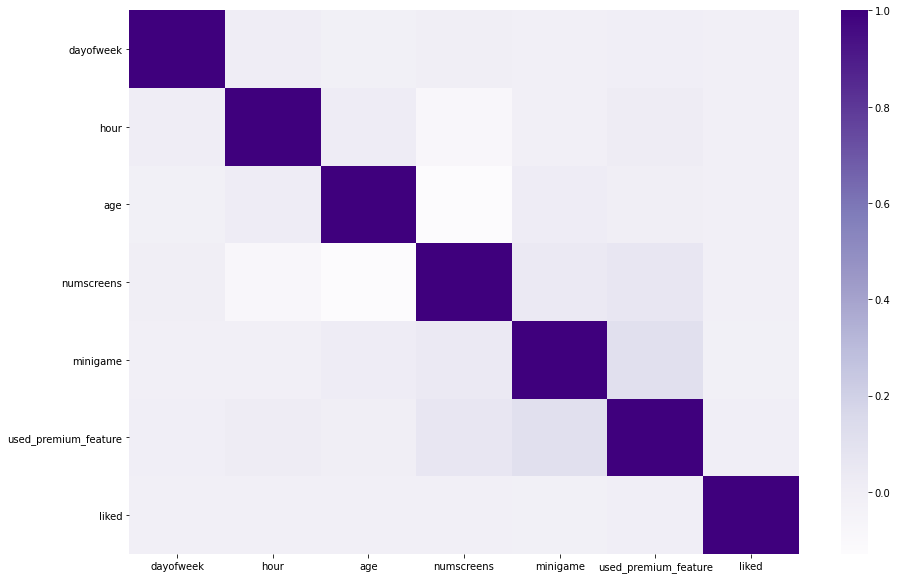

In [224]:
plt.figure(figsize=(15,10))
sns.heatmap(data=bfc, cmap="Purples")
plt.xticks(rotation=0)

# This is a shortcut to hide the tick information
print(end="")

## Feature Engineering

In [225]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [226]:
data['first_open'] = [parser.parse(row_data) for row_data in data['first_open']]
data['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data['enrolled_date']]

In [227]:
data[['first_open', 'enrolled_date']].head(5)

,first_open,enrolled_date
0,2012-12-27 02:14:51.273,NaT
1,2012-12-02 01:16:00.905,NaT
2,2013-03-19 19:19:09.157,NaT
3,2013-07-05 16:08:46.354,2013-07-05 16:11:49.513
4,2013-02-26 18:50:48.661,2013-02-26 18:56:37.841


In [228]:
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [229]:
data['difference'] = (data['enrolled_date'] - data['first_open']).astype('timedelta64[h]')
data['difference']

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: difference, Length: 50000, dtype: float64

In [230]:
data.difference.describe()

count    31074.000000
mean       190.791659
std        621.887155
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       5434.000000
Name: difference, dtype: float64

Text(0.5, 1.0, 'Distribution of Time(hours) between Enroll Date and First Open Date')

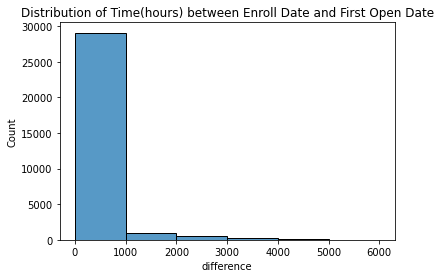

In [231]:
sns.histplot(data=data.dropna(), x='difference', binwidth=1000)
plt.title("Distribution of Time(hours) between Enroll Date and First Open Date")

Text(0.5, 1.0, 'Distribution of Time(hours) between Enroll Date and First Open Date')

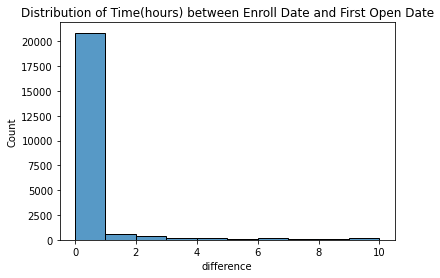

In [232]:
sns.histplot(data=data.dropna(), x='difference', binwidth=1, binrange=(0,10))
plt.title("Distribution of Time(hours) between Enroll Date and First Open Date")

In [233]:
data.loc[data.difference > 48, 'enrolled'] = 0
data = data.drop(columns=['difference', 'enrolled_date', 'first_open'])

In [234]:
data.head(5)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [235]:
top_screens = pd.read_csv('data/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [236]:
data["screen_list"] = data.screen_list.astype(str)
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)

data = data.drop(columns=['screen_list'])
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [237]:
response = data['enrolled']
data = data.drop(columns=['enrolled', 'user'])
data.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendToken', 'TransactionLis

In [ ]:
from sklearn.preprocessing import StandardScaler

In [244]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [238]:
from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, response.values, test_size=0.33, random_state=42)

In [267]:
print("X train:", X_train[:5, :5])
print("X test:", X_test[:5, :5])
print("y train:", y_train[:5])
print("y test:", y_test[:5])

X train: [[ 0.96956831  0.46286383  2.61733872 -0.64187943 -0.34763494]
 [ 0.47743663  0.19397425  1.78425241 -0.38756652 -0.34763494]
 [-0.50682673  1.00064299  2.15451299 -0.26041006 -0.34763494]
 [-0.01469505  0.46286383 -0.99270194  0.43895044 -0.34763494]
 [ 1.4617     -1.28491843 -0.34474592  0.82041981 -0.34763494]]
X test: [[-0.50682673  0.19397425 -0.06705049  1.83767145 -0.34763494]
 [-1.4910901  -0.07491533  1.9693827  -1.08692702 -0.34763494]
 [-0.99895842  0.73175341 -0.90013679 -0.83261411 -0.34763494]
 [-0.99895842 -1.28491843  0.1180798  -0.06967538 -0.34763494]
 [-1.4910901  -1.41936322  0.21064495  0.5661069  -0.34763494]]
y train: [1 1 1 1 1]
y test: [1 1 1 1 1]


## Training our model

In [271]:
from sklearn.linear_model import LogisticRegression

In [274]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)

LogisticRegression()

In [275]:
y_pred = clf.predict(X_test)

In [276]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

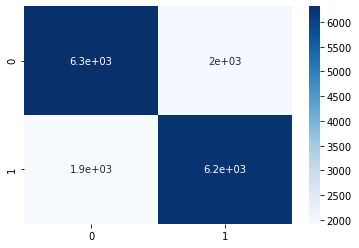

In [278]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, cmap="Blues", annot=True)

In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      8342
           1       0.75      0.76      0.76      8158

    accuracy                           0.76     16500
   macro avg       0.76      0.76      0.76     16500
weighted avg       0.76      0.76      0.76     16500



In [282]:
from sklearn.model_selection import cross_val_score

In [289]:
accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)

In [290]:
print(accuracies)

[0.7519403  0.76507463 0.75641791 0.77313433 0.76029851 0.76179104
 0.74626866 0.75313433 0.75283582 0.74358209]


In [291]:
print(f"Average accuracy: {round(accuracies.mean() * 100,2)}%")

Average accuracy: 75.64%


## Conclusion

With our accuracy of around 76%, we do see that this has a reasonable score when predicting whether a user will purchase a subscription.<br>
Potentionally, this could be extended to include when the user will most likely consider purchasing the subscription, which we can then use to more resourcefully target our marketing towards those users. 